In [1]:
import glob
import numpy as np
import matplotlib.image as mpimg
from skimage.transform import resize
from tqdm.notebook import tqdm

In [4]:
imgfiles = [f for f in glob.glob("./data/*.jpeg")]

In [6]:
X = []
Y = []
for imgfile in tqdm(imgfiles):
    image = mpimg.imread(imgfile)
    image_resized = resize(image, (150, 150),
                       anti_aliasing=True)
    X.append(list(np.resize(image_resized,(150,150,1))))
    if(imgfile[:-5].find("p") != -1):
        Y.append(1)
    if(imgfile[:-5].find("n") != -1):
        Y.append(0)
    

In [9]:
np.shape(X)

(300, 150, 150, 1)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    shuffle=True,
    random_state=42,
)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [12]:
(X_train.shape)

(240, 150, 150, 1)

In [14]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 73984)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                4

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Train on 240 samples, validate on 60 samples
Epoch 1/10
240/240 [==============================] - 6s 26ms/sample - loss: 0.8807 - accuracy: 0.5333 - val_loss: 0.6838 - val_accuracy: 0.5167
Epoch 2/10
240/240 [==============================] - 4s 19ms/sample - loss: 0.6896 - accuracy: 0.5000 - val_loss: 0.6923 - val_accuracy: 0.4833
Epoch 3/10
240/240 [==============================] - 4s 18ms/sample - loss: 0.6841 - accuracy: 0.5333 - val_loss: 0.6913 - val_accuracy: 0.4833
Epoch 4/10
240/240 [==============================] - 5s 19ms/sample - loss: 0.6775 - accuracy: 0.5458 - val_loss: 0.7257 - val_accuracy: 0.4833
Epoch 5/10
240/240 [==============================] - 4s 18ms/sample - loss: 0.6663 - accuracy: 0.5792 - val_loss: 0.7165 - val_accuracy: 0.4833
Epoch 6/10
240/240 [==============================] - 4s 17ms/sample - loss: 0.6380 - accuracy: 0.6417 - val_loss: 0.6013 - val_accuracy: 0.7500
Epoch 7/10
240/240 [==============================] - 4s 18ms/sample - loss: 0.5780 -

In [18]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

60/60 - 0s - loss: 0.5670 - accuracy: 0.7167


In [19]:
import matplotlib.pyplot as plt

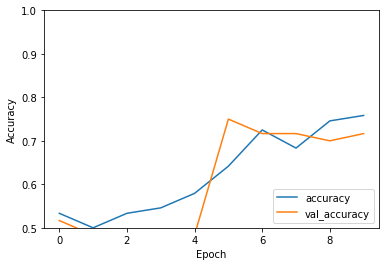

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [21]:
model.save("pap_model.h5")